<a href="https://colab.research.google.com/github/knoel99/epf/blob/master/training_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network with no hidden layer, all linear and no activation function

In [ ]:
!wget "https://github.com/knoel99/MNIST/raw/master/mnist_train.csv.zip"
!wget "https://github.com/knoel99/MNIST/raw/master/mnist_test.csv.zip"

!wget "https://github.com/knoel99/MNIST/raw/master/nn_identity_biases.npy"
!wget "https://github.com/knoel99/MNIST/raw/master/nn_identity_weights.npy"

!wget "https://github.com/knoel99/MNIST/raw/master/nn_sigmoid_biases.npy"
!wget "https://github.com/knoel99/MNIST/raw/master/nn_sigmoid_weights.npy"

!wget "https://github.com/knoel99/MNIST/raw/master/nn_relu_biases.npy"
!wget "https://github.com/knoel99/MNIST/raw/master/nn_relu_weights.npy"

--2024-03-26 17:06:57--  https://github.com/knoel99/MNIST/raw/master/mnist_train.csv.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/knoel99/MNIST/master/mnist_train.csv.zip [following]
--2024-03-26 17:06:57--  https://raw.githubusercontent.com/knoel99/MNIST/master/mnist_train.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13692401 (13M) [application/zip]
Saving to: ‘mnist_train.csv.zip’

mnist_train.csv.zip 100%[===================>]  13.06M  --.-KB/s    in 0.1s    

2024-03-26 17:06:58 (106 MB/s) - ‘mnist_train.csv.zip’ saved [13692401/13692401]

--2024-03-26 17:06:58--  https

In [ ]:
!ls -lh
!unzip  mnist_train.csv.zip
!unzip  mnist_test.csv.zip

total 16M
-rw-r--r-- 1 root root 2.2M Mar 26 17:06 mnist_test.csv.zip
-rw-r--r-- 1 root root  14M Mar 26 17:06 mnist_train.csv.zip
-rw-r--r-- 1 root root  208 Mar 26 17:06 nn_identity_biases.npy
-rw-r--r-- 1 root root  62K Mar 26 17:07 nn_identity_weights.npy
-rw-r--r-- 1 root root  208 Mar 26 17:07 nn_relu_biases.npy
-rw-r--r-- 1 root root  62K Mar 26 17:07 nn_relu_weights.npy
-rw-r--r-- 1 root root  208 Mar 26 17:07 nn_sigmoid_biases.npy
-rw-r--r-- 1 root root  62K Mar 26 17:07 nn_sigmoid_weights.npy
drwxr-xr-x 1 root root 4.0K Mar 25 17:06 sample_data
Archive:  mnist_train.csv.zip
  inflating: mnist_train.csv         
Archive:  mnist_test.csv.zip
  inflating: mnist_test.csv          


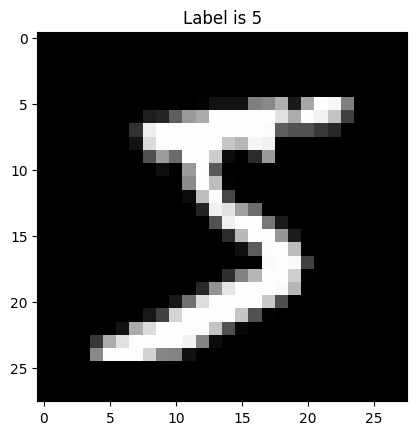

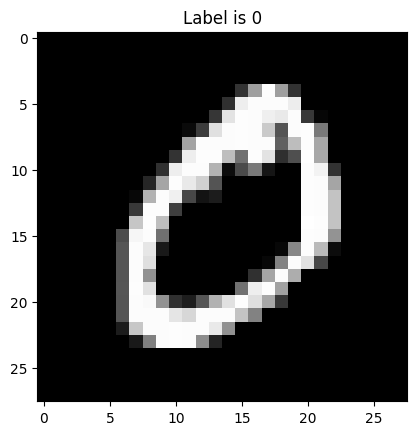

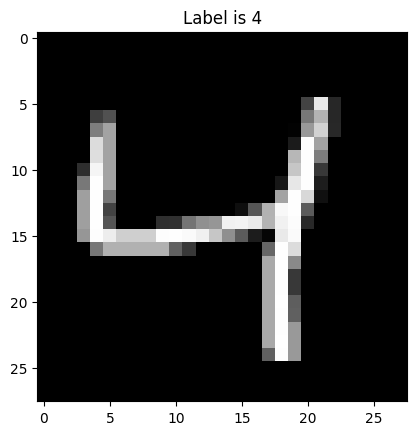

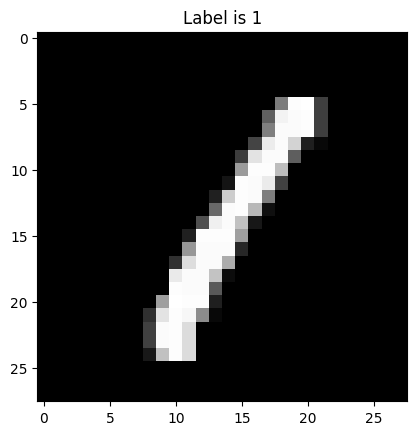

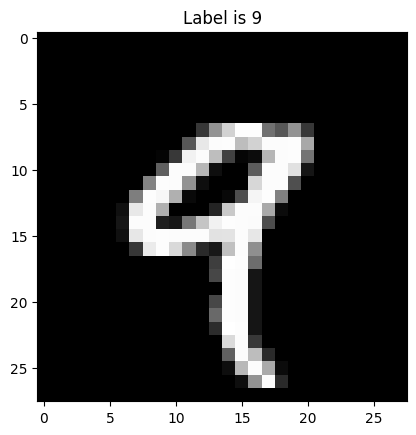

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Assuming you've already uploaded the CSV files to your Colab environment
mnist_train_path = 'mnist_train.csv' # Update this path if necessary
mnist_test_path = 'mnist_test.csv'   # Update this path if necessary

train_data = pd.read_csv(mnist_train_path)
test_data = pd.read_csv(mnist_test_path)

# Step 2: Display some of the images and labels
def display_image(data, index):
    """Display an image and its label."""
    # The first column is the label
    label = data.iloc[index, 0]
    # The rest of the columns are pixels
    pixels = data.iloc[index, 1:].values.reshape((28, 28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

# Display the first 5 images in the training set
for i in range(5):
    display_image(train_data, i)


In [ ]:
# Load the dataset in dataframe

import pandas as pd
import numpy as np

# Load the dataset
mnist_train_path = 'mnist_train.csv' # Update this path if necessary
train_data = pd.read_csv(mnist_train_path)

# Assuming the first column 'label' is the target variable and the rest are features
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

# Normalize the features to be between 0 and 1
X_train = X_train / 255.0

# Convert y_train to one-hot encoding
def one_hot_encode(y, num_classes):
    """Convert a vector of labels to one-hot encoded format."""
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

y_train = one_hot_encode(y_train, 10) # 10 classes for digits 0-9


In [ ]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error between true labels and predictions.

    Parameters:
    - y_true: np.array, true labels
    - y_pred: np.array, predicted labels

    Returns:
    - mse: float, the mean squared error
    """
    mse = np.mean(np.square(y_true - y_pred))
    return mse

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def identity(x):
    return x

def identity_derivative(x):
    return np.ones_like(x)

class SimpleNeuralNetwork:
    def __init__(self, input_size, output_size, activation='identity'):
        self.weights = 0.01 * np.random.randn(input_size, output_size)
        self.bias = np.zeros((1, output_size))
        # History tracking
        self.weights_history = []
        self.bias_history = []
        self.loss_history = []
        self.epoch_times = []
        self.specific_weights_history = []
        # Set activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else: # Default to identity if no recognized activation is provided
            self.activation = identity
            self.activation_derivative = identity_derivative

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

    def train(self, X, y, epochs, learning_rate):
        # Initialize history for specific weights
        pixel_indices = [(9, 9), (9, 14), (9, 19), (14, 9), (14, 14), (14, 19), (19, 9), (19, 14), (19, 19)]
        flattened_indices = [28 * x + y for x, y in pixel_indices]
        for _ in range(len(flattened_indices)):
            self.specific_weights_history.append([])

        for epoch in range(epochs):
            epoch_start_time = time.time()

            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            predictions = self.activation(z)

            # Compute loss (assuming MSE for simplicity)
            loss = np.mean((predictions - y) ** 2)
            self.loss_history.append(loss)

            # Backpropagation
            d_loss = 2 * (predictions - y) / y.size
            d_activation = self.activation_derivative(z)
            d_z = d_loss * d_activation
            d_weights = np.dot(X.T, d_z)
            d_bias = np.sum(d_z, axis=0, keepdims=True)

            # Update parameters
            self.weights -= learning_rate * d_weights
            self.bias -= learning_rate * d_bias

            # Update weights and bias history for visualization
            self.weights_history.append(self.weights[0][0])  # Example: First weight
            self.bias_history.append(self.bias[0][0])  # Example: First bias

            # Record specific weights history
            for i, index in enumerate(flattened_indices):
                self.specific_weights_history[i].append(self.weights[index][0])  # Tracking the first output neuron as an example

            epoch_end_time = time.time()
            self.epoch_times.append(epoch_end_time - epoch_start_time)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Time: {(epoch_end_time - epoch_start_time):.4f} seconds")

    def plot_training_insights(self):
        # General Training Insights
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 2, 1)
        plt.plot(self.loss_history)
        plt.title('Loss Evolution')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.subplot(2, 2, 2)
        cumulative_time = np.cumsum(self.epoch_times)
        plt.plot(cumulative_time, self.loss_history)
        plt.title('Loss vs. Cumulative Time')
        plt.xlabel('Cumulative Time (s)')
        plt.ylabel('Loss')

        plt.subplot(2, 2, 3)
        plt.plot(self.epoch_times)
        plt.title('Epoch Duration')
        plt.xlabel('Epoch')
        plt.ylabel('Duration (s)')

        plt.subplot(2, 2, 4)
        plt.plot(self.weights_history, label='Weights History')
        plt.plot(self.bias_history, label='Bias History', linestyle='--')
        plt.title('Weights and Bias Evolution')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Plot for Specific Weights
        plt.figure(figsize=(18, 6))
        plot_positions = [(10, 10), (10, 15), (10, 20), (15, 10), (15, 15), (15, 20), (20, 10), (20, 15), (20, 20)]
        for i, position in enumerate(plot_positions):
            plt.subplot(3, 3, i+1)
            plt.plot(self.specific_weights_history[i])
            plt.title(f'Pixel {position[0]}x{position[1]} Weight Evolution')
            plt.xlabel('Epoch')
            plt.ylabel('Weight Value')
        plt.tight_layout()
        plt.show()


In [ ]:
nn_identity = SimpleNeuralNetwork(input_size=784, output_size=10, activation='identity')
nn_identity.train(X_train, y_train, epochs=1000, learning_rate=0.01)

Epoch 0, Loss: 0.1175, Time: 0.3207 seconds
Epoch 100, Loss: 0.0708, Time: 0.3690 seconds
Epoch 200, Loss: 0.0606, Time: 0.6882 seconds
Epoch 300, Loss: 0.0557, Time: 0.7493 seconds
Epoch 400, Loss: 0.0528, Time: 0.3965 seconds
Epoch 500, Loss: 0.0509, Time: 1.2816 seconds
Epoch 600, Loss: 0.0495, Time: 0.3820 seconds
Epoch 700, Loss: 0.0484, Time: 0.3684 seconds
Epoch 800, Loss: 0.0476, Time: 0.3835 seconds
Epoch 900, Loss: 0.0469, Time: 0.3825 seconds


In [ ]:
nn_sigmoid  = SimpleNeuralNetwork(input_size=784, output_size=10, activation='sigmoid')
nn_sigmoid .train(X_train, y_train, epochs=1000, learning_rate=0.01)

Epoch 0, Loss: 0.2469, Time: 0.4379 seconds
Epoch 100, Loss: 0.1588, Time: 0.5546 seconds
Epoch 200, Loss: 0.1268, Time: 0.4952 seconds
Epoch 300, Loss: 0.1123, Time: 0.4194 seconds
Epoch 400, Loss: 0.1044, Time: 0.4445 seconds
Epoch 500, Loss: 0.0995, Time: 0.4075 seconds
Epoch 600, Loss: 0.0961, Time: 0.4125 seconds
Epoch 700, Loss: 0.0936, Time: 0.4192 seconds
Epoch 800, Loss: 0.0916, Time: 0.4010 seconds
Epoch 900, Loss: 0.0900, Time: 0.4003 seconds


In [ ]:
nn_relu     = SimpleNeuralNetwork(input_size=784, output_size=10, activation='relu')
nn_relu    .train(X_train, y_train, epochs=1000, learning_rate=0.01)

In [ ]:
import numpy as np

def save_model(model, filename_prefix):
    np.save(f"{filename_prefix}_weights.npy", model.weights)
    np.save(f"{filename_prefix}_biases.npy", model.bias)

# Example usage
#save_model(nn_identity, 'nn_identity')
#save_model(nn_sigmoid, 'nn_sigmoid')
#save_model(nn_relu, 'nn_relu')


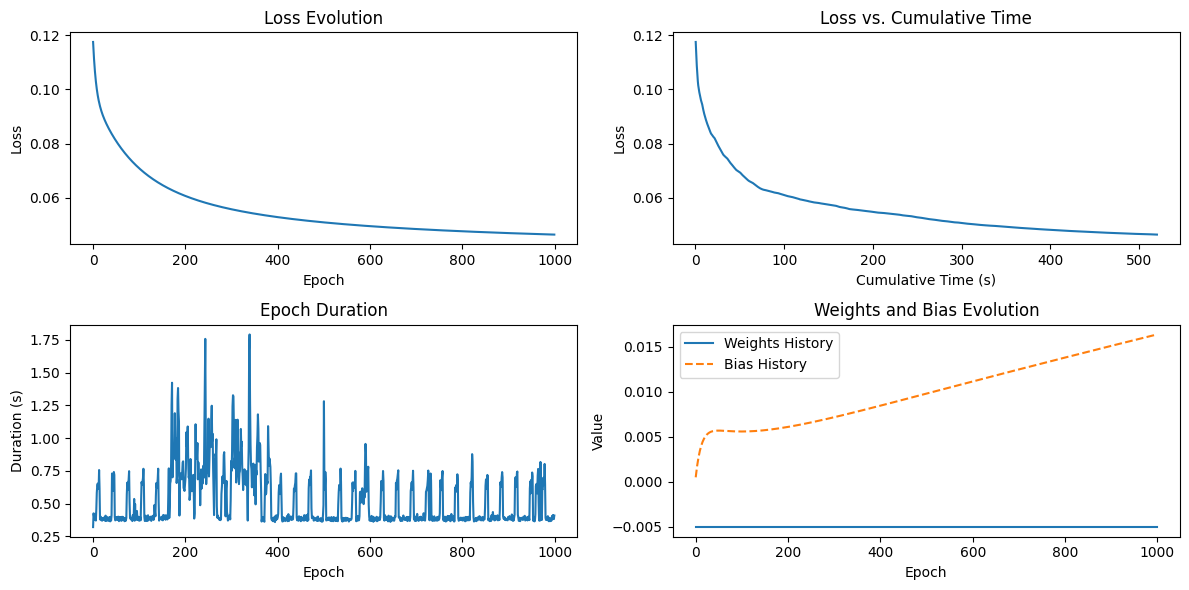

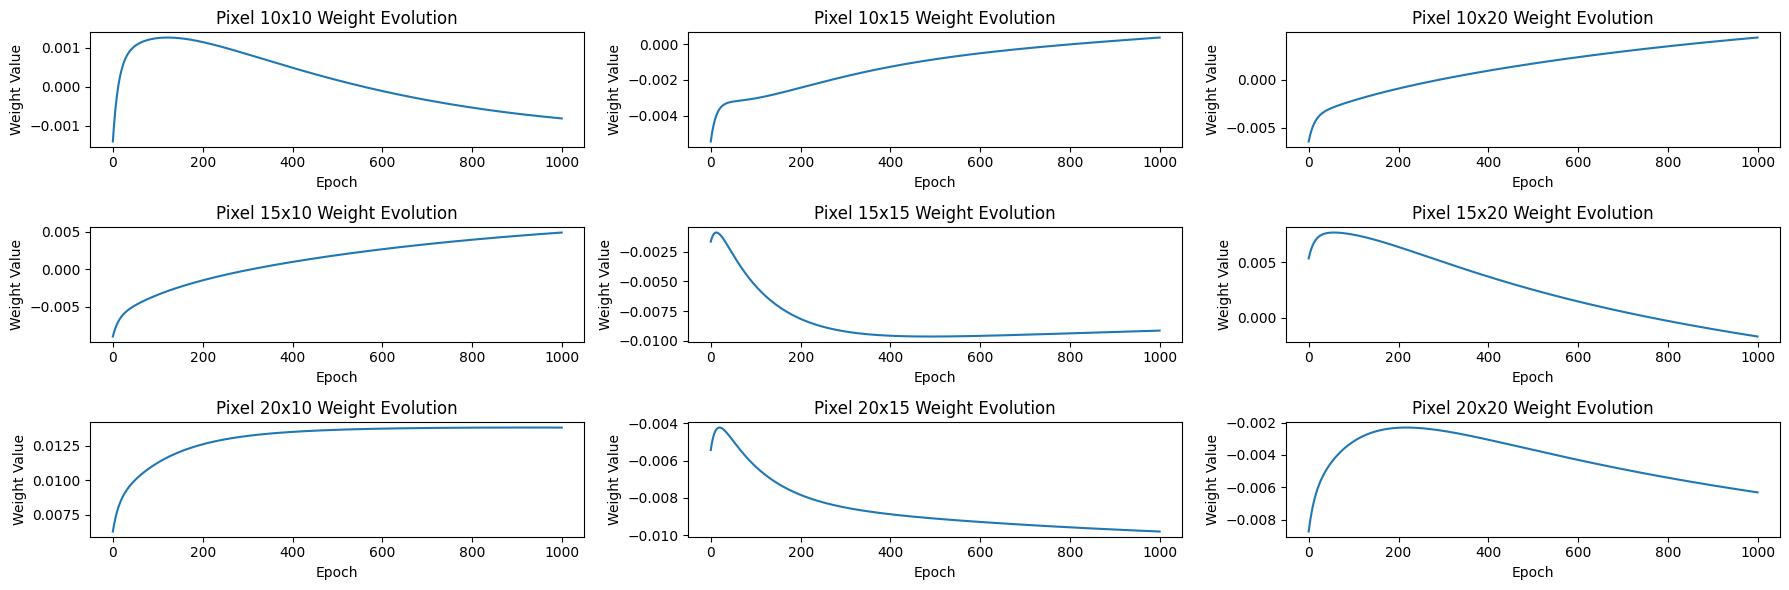

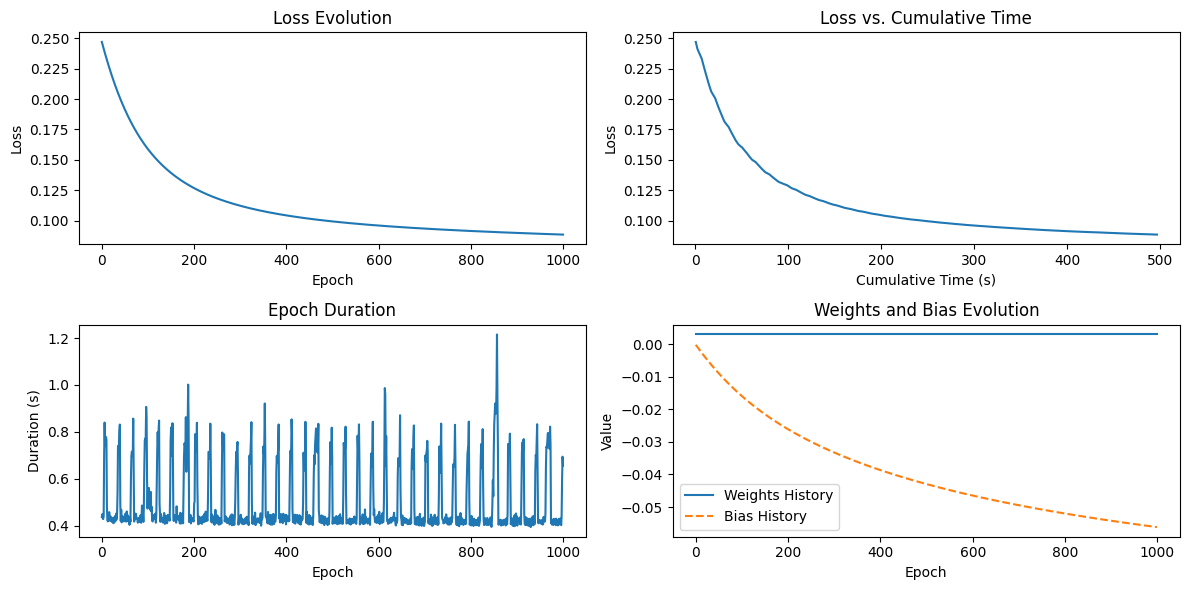

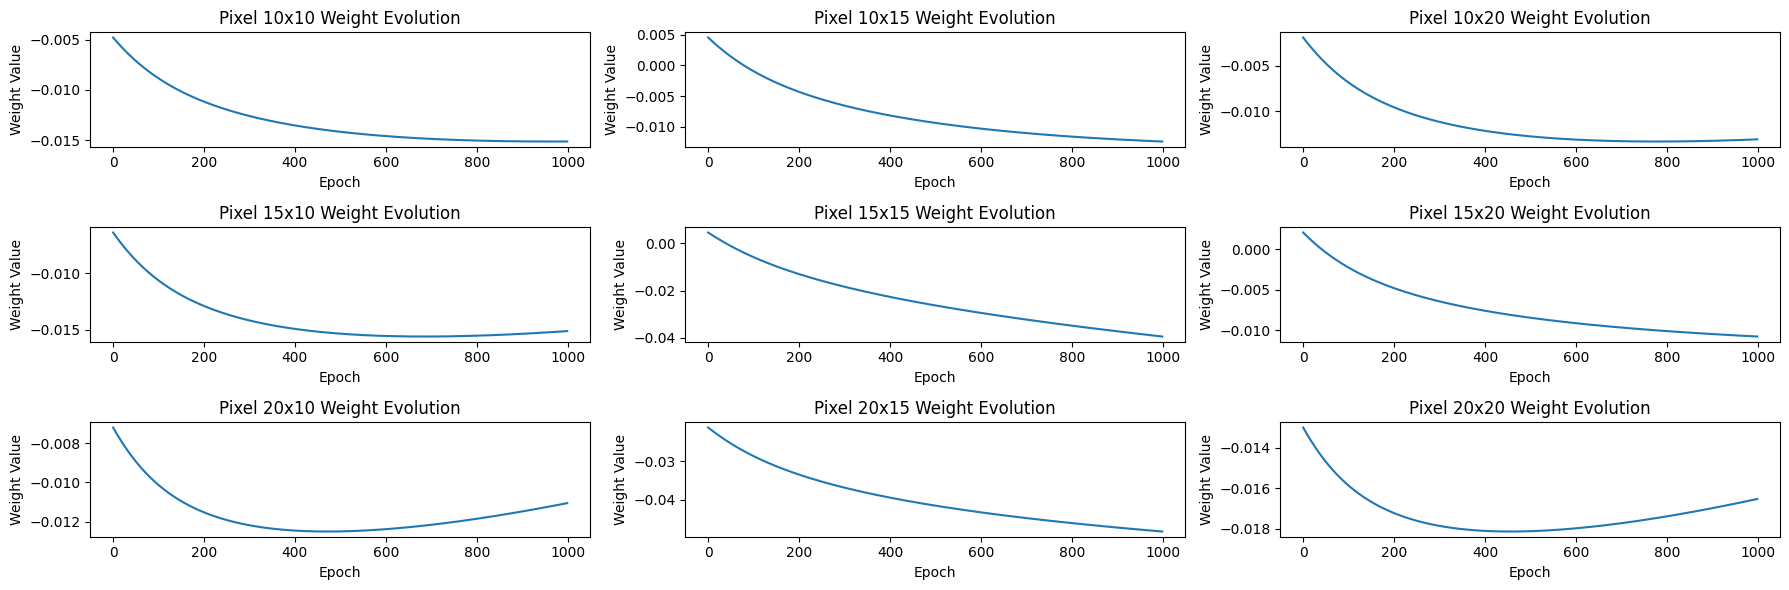

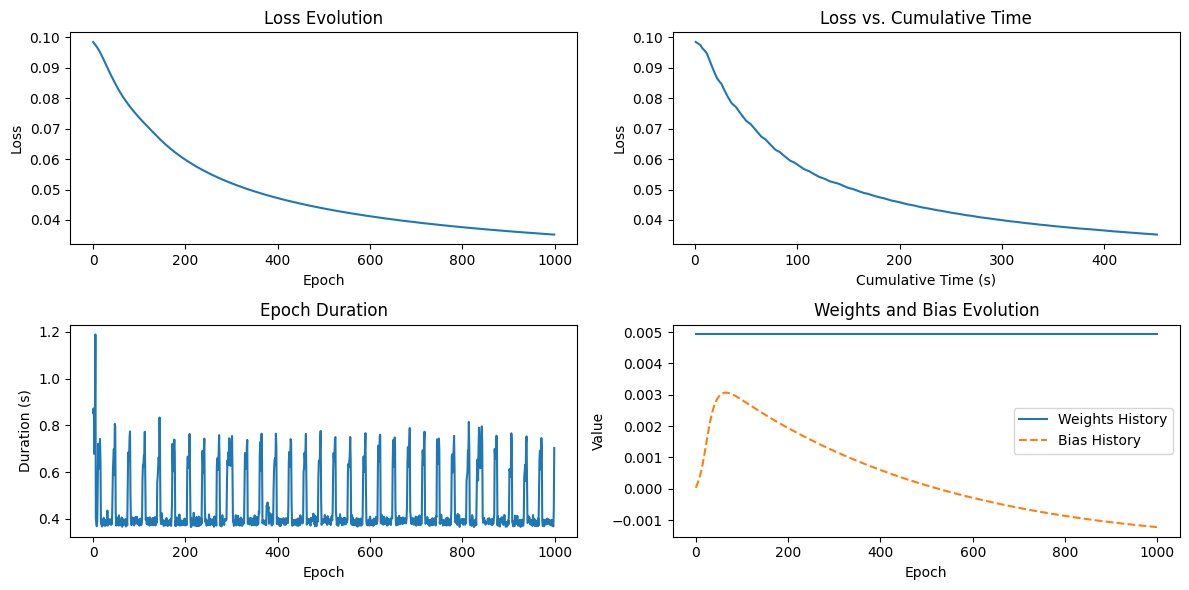

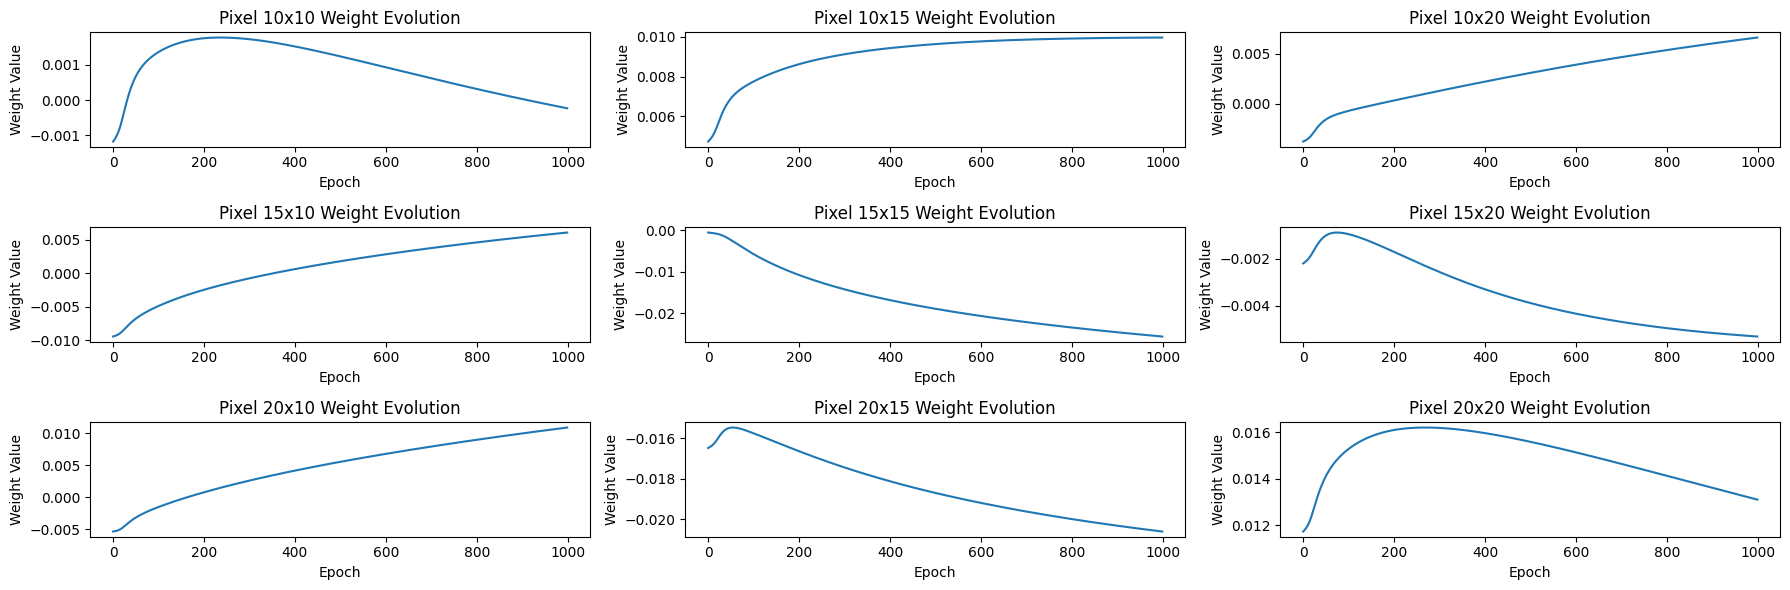

In [ ]:
nn_identity.plot_training_insights()
nn_sigmoid .plot_training_insights()
nn_relu    .plot_training_insights()

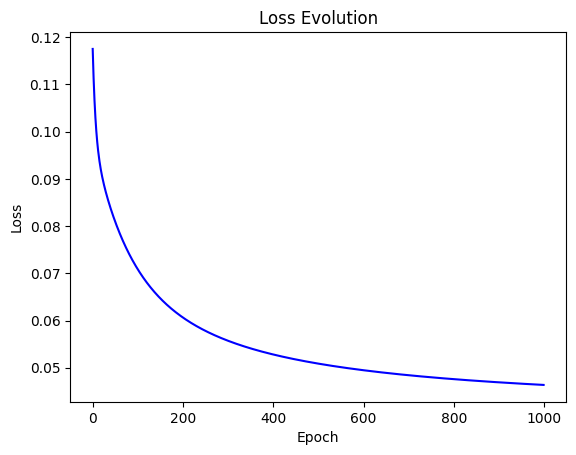

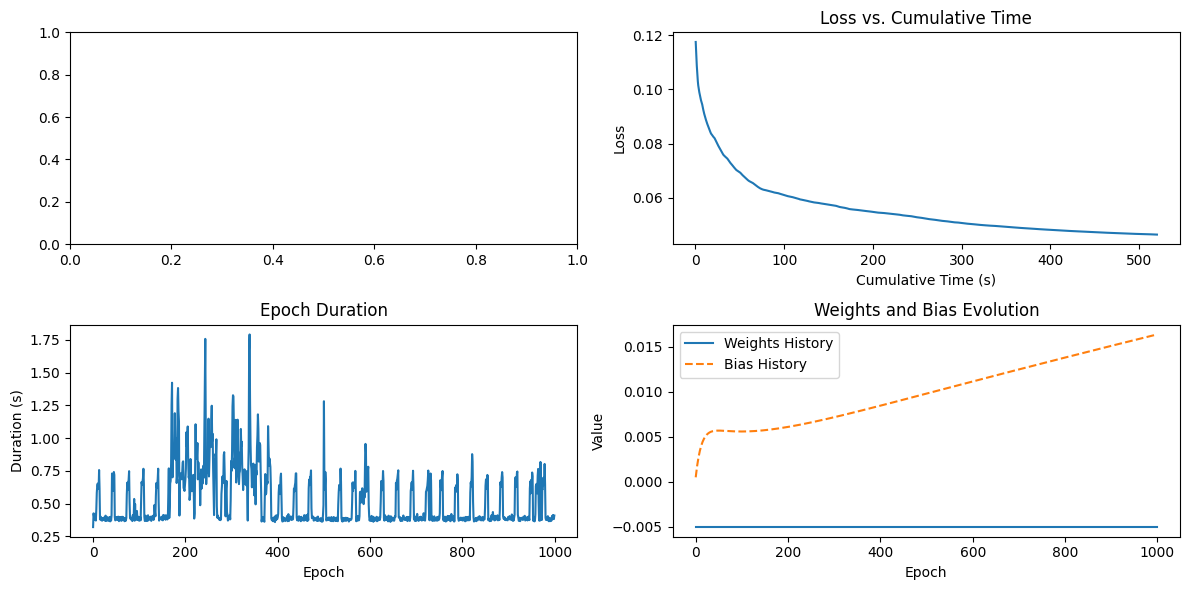

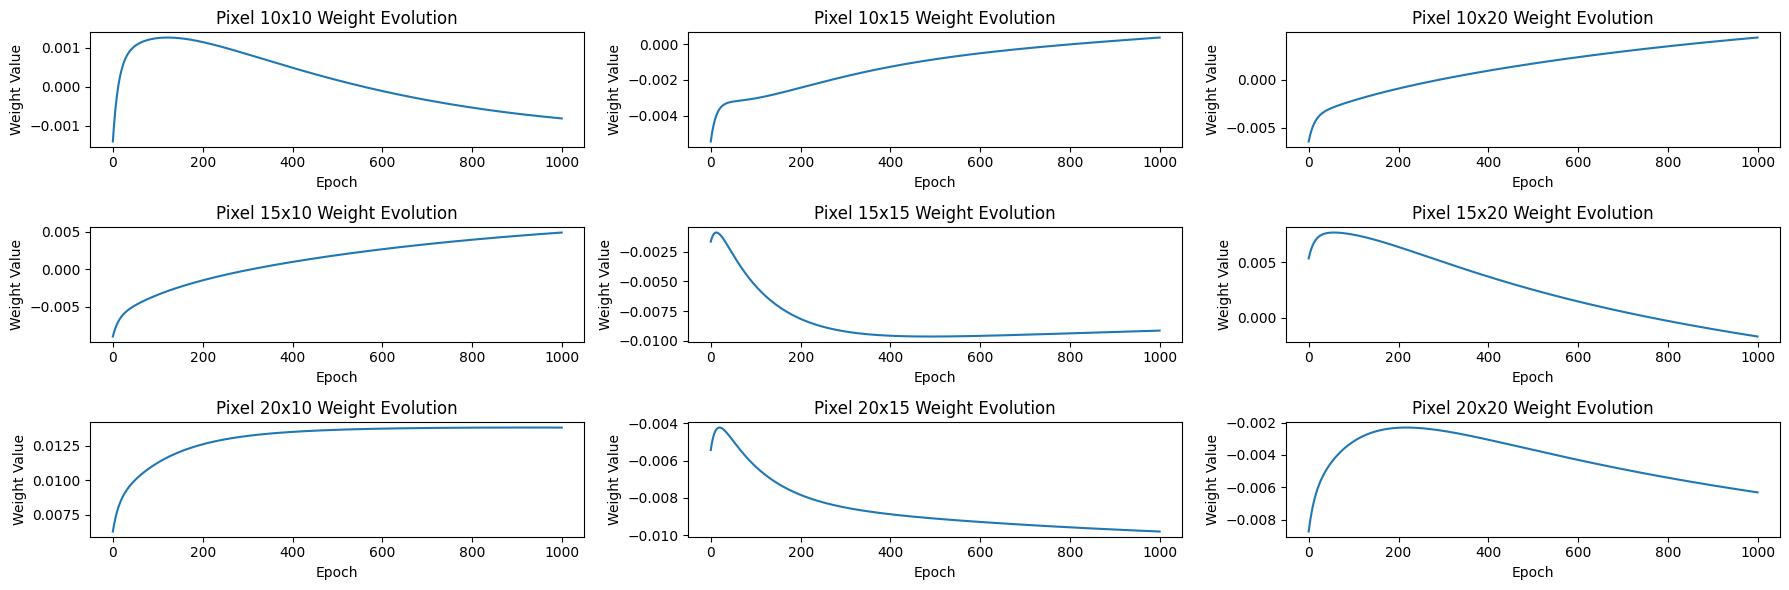

In [ ]:
def plot_training_insights2(nn):
  # General Training Insights
  plt.plot(nn.loss_history, color='b')
  plt.title('Loss Evolution')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.figure(figsize=(12, 6))

  plt.subplot(2, 2, 1)


  plt.subplot(2, 2, 2)
  cumulative_time = np.cumsum(nn.epoch_times)
  plt.plot(cumulative_time, nn.loss_history)
  plt.title('Loss vs. Cumulative Time')
  plt.xlabel('Cumulative Time (s)')
  plt.ylabel('Loss')

  plt.subplot(2, 2, 3)
  plt.plot(nn.epoch_times)
  plt.title('Epoch Duration')
  plt.xlabel('Epoch')
  plt.ylabel('Duration (s)')

  plt.subplot(2, 2, 4)
  plt.plot(nn.weights_history, label='Weights History')
  plt.plot(nn.bias_history, label='Bias History', linestyle='--')
  plt.title('Weights and Bias Evolution')
  plt.xlabel('Epoch')
  plt.ylabel('Value')
  plt.legend()

  plt.tight_layout()
  plt.show()

  # Plot for Specific Weights
  plt.figure(figsize=(18, 6))
  plot_positions = [(10, 10), (10, 15), (10, 20), (15, 10), (15, 15), (15, 20), (20, 10), (20, 15), (20, 20)]
  for i, position in enumerate(plot_positions):
      plt.subplot(3, 3, i+1)
      plt.plot(nn.specific_weights_history[i])
      plt.title(f'Pixel {position[0]}x{position[1]} Weight Evolution')
      plt.xlabel('Epoch')
      plt.ylabel('Weight Value')
  plt.tight_layout()
  plt.show()

plot_training_insights2(nn_identity)


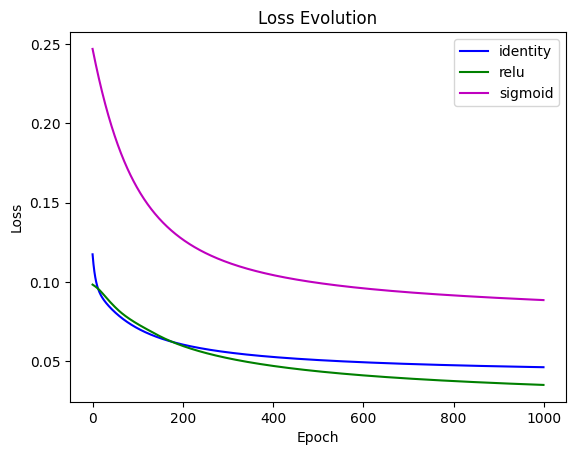

In [ ]:
def plot_compare_loss(nn1, nn2, nn3):
  plt.plot(nn1.loss_history, color='b',label='identity')
  plt.plot(nn3.loss_history, color='g',label='relu')
  plt.plot(nn2.loss_history, color='m',label='sigmoid')

  plt.title('Loss Evolution')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_compare_loss(nn_identity, nn_sigmoid, nn_relu)


In [ ]:
print(len(nn_identity.loss_history))

1000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the test data (similar to how you prepared the training data)
mnist_test_path = 'mnist_test.csv' # Update this path if necessary
test_data = pd.read_csv(mnist_test_path)
X_test = test_data.drop('label', axis=1).values / 255.0
y_test = one_hot_encode(test_data['label'].values, 10)


def compute_accuracy(network, X, y):
    correct_predictions = 0
    for i in range(len(X)):
        prediction = network.predict(X[i:i+1])
        predicted_class = np.argmax(prediction)
        true_class = np.argmax(y[i])
        if predicted_class == true_class:
            correct_predictions += 1
    return (correct_predictions / len(X)) * 100


def test_and_plot_accuracy1(nn1, X_train, y_train, X_test, y_test, sota_accuracy=99.7):
    # Compute training set accuracy first
    training_accuracy1 = compute_accuracy(nn1, X_train, y_train)

    correct_predictions1 = 0

    test_accuracy_history1 = []

    for i in range(len(X_test)):
        true_class = np.argmax(y_test[i])

        prediction1 = nn1.predict(X_test[i:i+1])

        predicted_class1 = np.argmax(prediction1)

        if predicted_class1 == true_class:
            correct_predictions1 += 1

        # Current accuracy
        current_accuracy1 = (correct_predictions1 / (i + 1)) * 100

        test_accuracy_history1.append(current_accuracy1)

        # Cumulative average accuracy up to current sample
        cumulative_average_accuracy1 = np.mean(test_accuracy_history1)

    # Plot the accuracy evolution
    plt.figure(figsize=(10, 6))

    plt.plot(test_accuracy_history1, color='b', label='Identity')
    plt.axhline(y=training_accuracy1, color='b', linestyle='--', label=f'Average accuracy Identity ({training_accuracy1:.2f}%)')

    plt.axhline(y=sota_accuracy, color='r', linestyle='-', label=f'SOTA Accuracy ({sota_accuracy}%)')

    plt.title('Accuracy Evolution')
    plt.xlabel('Number of Samples Checked')
    plt.ylabel('Accuracy (%)')
    plt.ylim(50, 100)
    plt.legend(loc='lower right')
    plt.show()


def test_and_plot_accuracy(nn1, nn2, nn3, X_train, y_train, X_test, y_test, sota_accuracy=99.7):
    # Compute training set accuracy first
    training_accuracy1 = compute_accuracy(nn1, X_train, y_train)
    training_accuracy2 = compute_accuracy(nn2, X_train, y_train)
    training_accuracy3 = compute_accuracy(nn3, X_train, y_train)

    correct_predictions1 = 0
    correct_predictions2 = 0
    correct_predictions3 = 0

    test_accuracy_history1 = []
    test_accuracy_history2 = []
    test_accuracy_history3 = []

    for i in range(len(X_test)):
        true_class = np.argmax(y_test[i])

        prediction1 = nn1.predict(X_test[i:i+1])
        prediction2 = nn2.predict(X_test[i:i+1])
        prediction3 = nn3.predict(X_test[i:i+1])

        predicted_class1 = np.argmax(prediction1)
        predicted_class2 = np.argmax(prediction2)
        predicted_class3 = np.argmax(prediction3)

        if predicted_class1 == true_class:
            correct_predictions1 += 1
        if predicted_class2 == true_class:
            correct_predictions2 += 1
        if predicted_class3 == true_class:
            correct_predictions3 += 1

        # Current accuracy
        current_accuracy1 = (correct_predictions1 / (i + 1)) * 100
        current_accuracy2 = (correct_predictions2 / (i + 1)) * 100
        current_accuracy3 = (correct_predictions3 / (i + 1)) * 100

        test_accuracy_history1.append(current_accuracy1)
        test_accuracy_history2.append(current_accuracy2)
        test_accuracy_history3.append(current_accuracy3)

    # Plot the accuracy evolution
    plt.figure(figsize=(10, 6))

    plt.plot(test_accuracy_history1, color='b', label='Identity')
    plt.plot(test_accuracy_history2, color='g', label='Relu')
    plt.plot(test_accuracy_history3, color='m', label='Sigmoid')

    plt.axhline(y=training_accuracy1, color='b', linestyle='--', label=f'Average accuracy Identity ({training_accuracy1:.2f}%)')
    plt.axhline(y=training_accuracy2, color='g', linestyle='--', label=f'Average accuracy Relu ({training_accuracy2:.2f}%)')
    plt.axhline(y=training_accuracy3, color='m', linestyle='--', label=f'Average accuracy Sigmoid ({training_accuracy3:.2f}%)')

    plt.axhline(y=sota_accuracy, color='r', linestyle='-', label=f'SOTA Accuracy ({sota_accuracy}%)')

    plt.title('Accuracy Evolution')
    plt.xlabel('Number of Samples Checked')
    plt.ylabel('Accuracy (%)')
    plt.ylim(50, 100)
    plt.legend(loc='lower right')
    plt.show()

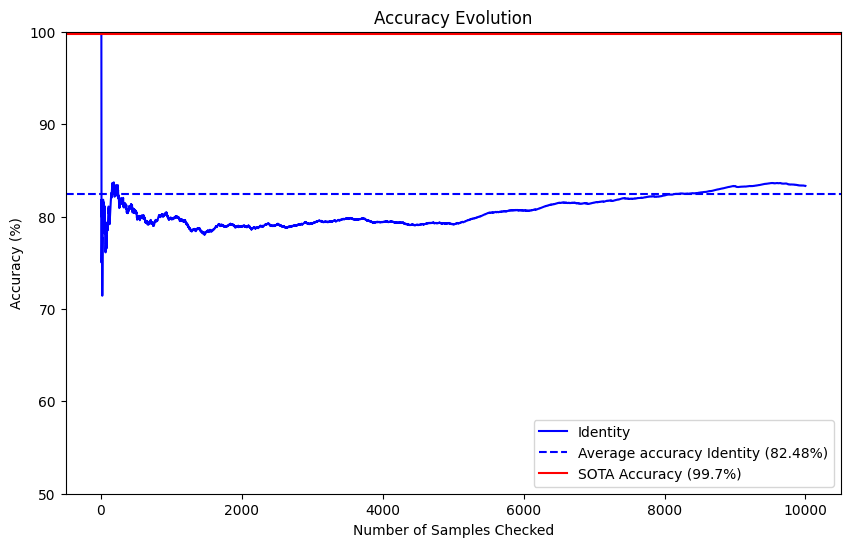

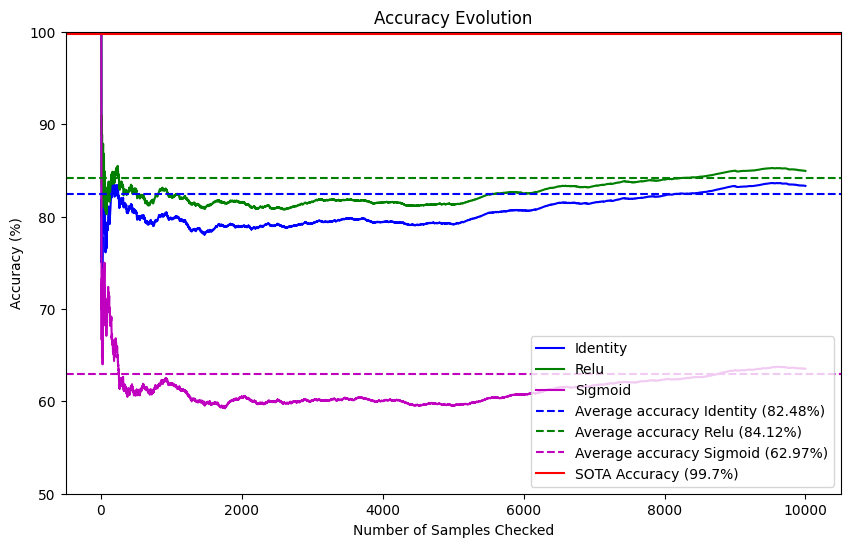

In [ ]:
test_and_plot_accuracy1(nn_identity, X_train, y_train, X_test, y_test)
test_and_plot_accuracy(nn_identity, nn_relu, nn_sigmoid, X_train, y_train, X_test, y_test)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(X, y, indices, title, predictions=None, convert=True):
    """Plot a selection of images, their labels, and model predictions.

    Parameters:
    - X: The images.
    - y: The true labels.
    - indices: Indices of the images to plot.
    - title: Title for the plots.
    - predictions: The predicted labels for the provided indices.
    - convert: Boolean indicating if images need reshaping.
    """
    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(indices[:5]):  # Plot up to 5 images from provided indices
        plt.subplot(1, 5, i + 1)
        img = X[idx].reshape(28, 28) if convert else X[idx]
        plt.imshow(img, cmap='gray')

        pred_text = f"Pred: {predictions[i]}" if predictions is not None else ""
        true_text = f"True: {np.argmax(y[idx])}"
        plt.title(f"{pred_text}\n{true_text}", fontsize=20, pad=5)
        plt.axis('off')

    plt.suptitle(title, fontsize=24, y=1.05)  # Adjust y parameter to lift the suptitle
    plt.tight_layout(pad=2.0)
    plt.show()


def evaluate_and_plot_samples(network, X_test, y_test):
    correct_indices = []
    incorrect_indices = []
    predictions = []

    for i in range(len(X_test)):
        prediction_vector = network.predict(X_test[i:i+1])
        predicted_class = np.argmax(prediction_vector)
        true_class = np.argmax(y_test[i])
        predictions.append(predicted_class)

        if predicted_class == true_class:
            #print("i = " + str(i) + " predicted_class=" + str(predicted_class) + " true_class= " + str(true_class))
            correct_indices.append(i)
        else:
            incorrect_indices.append(i)

        if len(correct_indices) >= 5 and len(incorrect_indices) >= 5:
            break

    # Extract predictions for correctly and incorrectly classified images
    correct_predictions = [predictions[i] for i in correct_indices]
    incorrect_predictions = [predictions[i] for i in incorrect_indices]

    # Plot correctly classified images with corresponding predictions
    plot_images(X_test, y_test, correct_indices, "Correctly Classified", [predictions[i] for i in correct_indices])

    # Plot incorrectly classified images with corresponding predictions
    plot_images(X_test, y_test, incorrect_indices, "Incorrectly Classified", [predictions[i] for i in incorrect_indices])


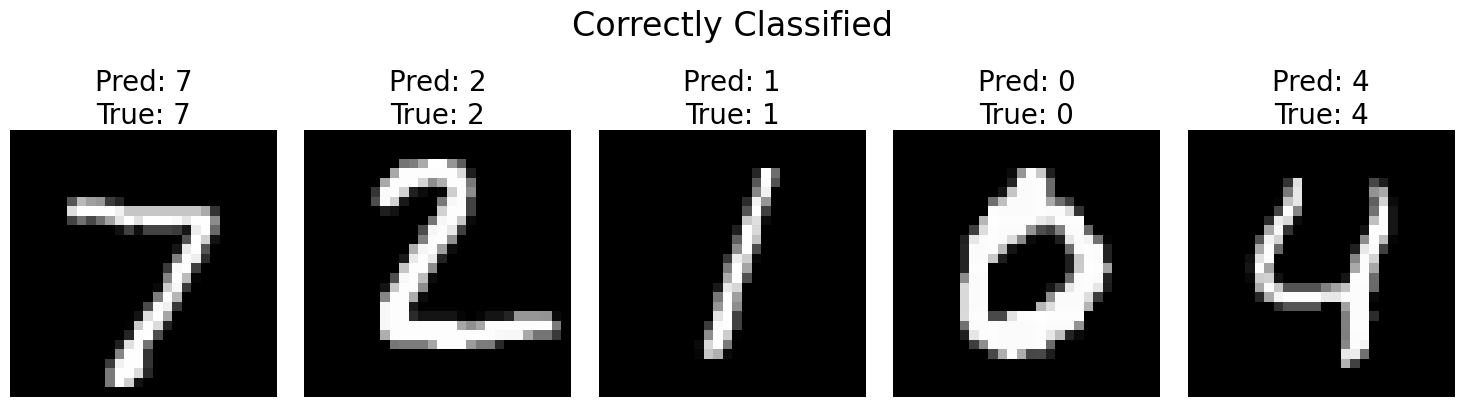

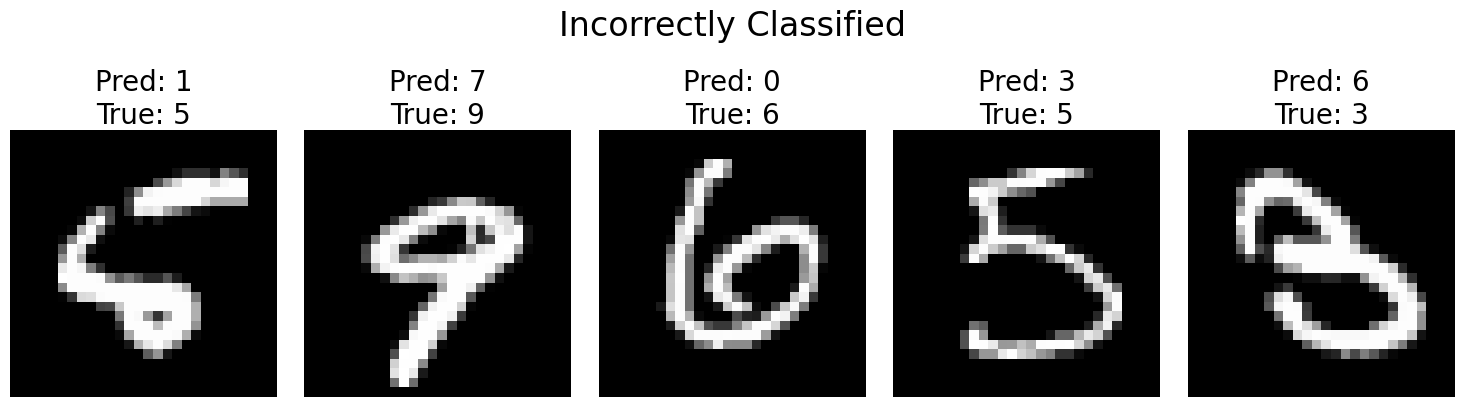

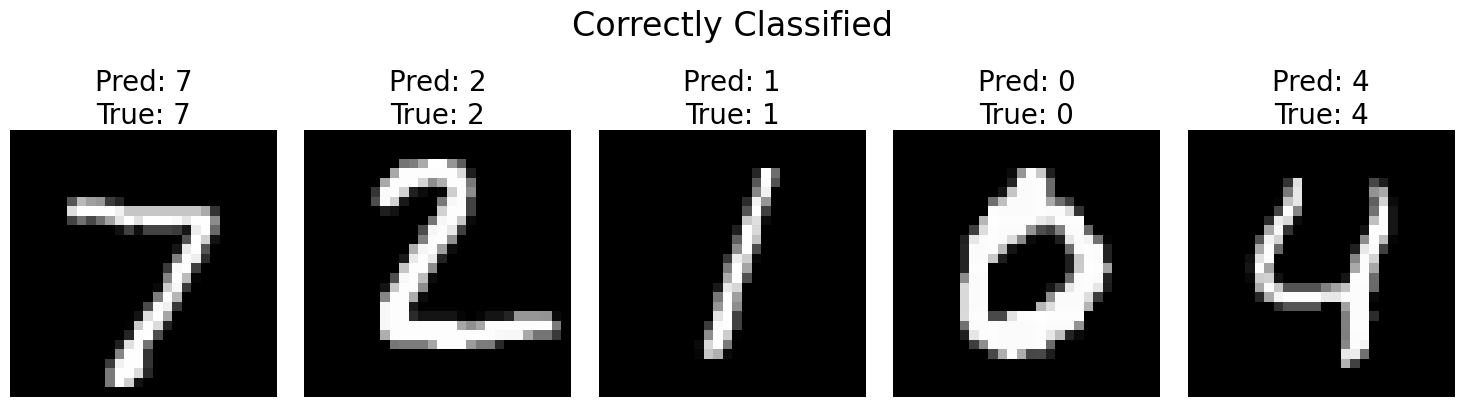

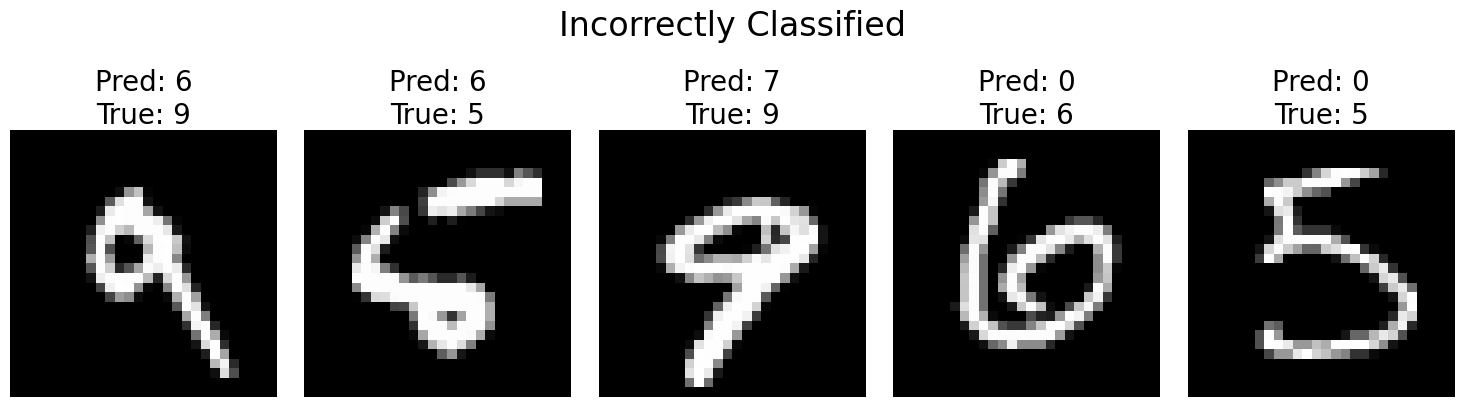

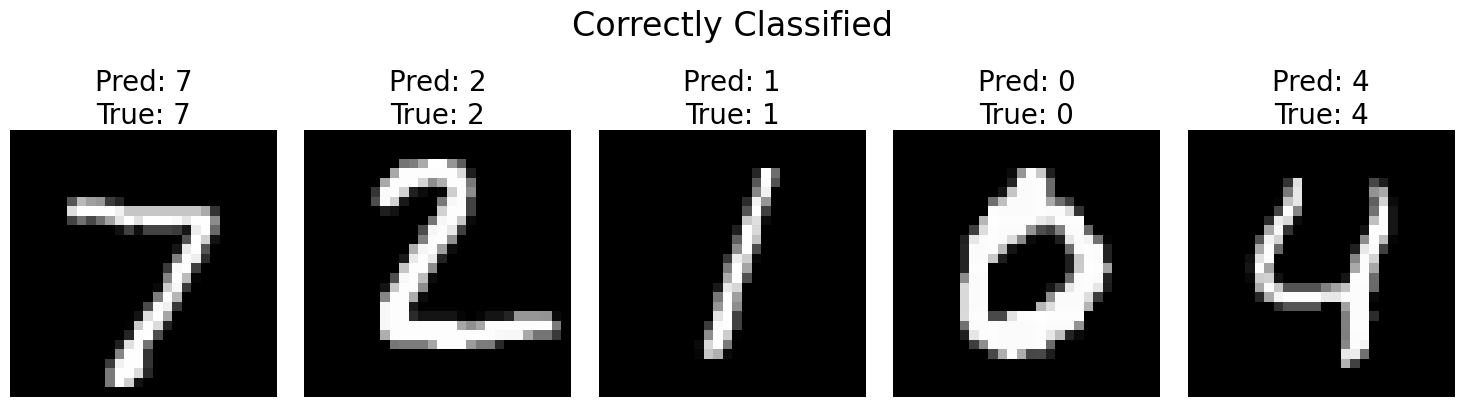

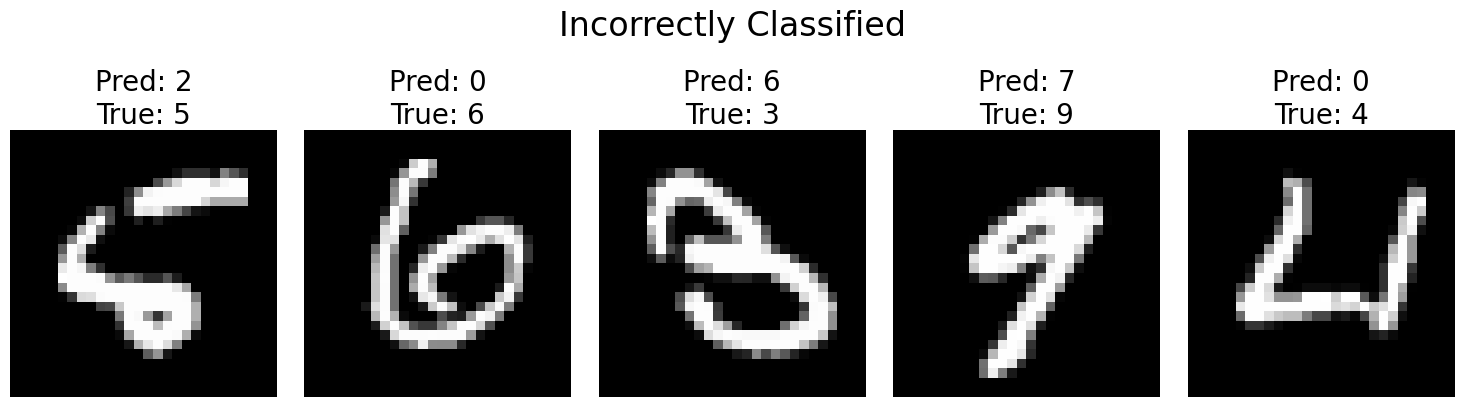

In [ ]:
# Assuming X_test and y_test are prepared and network is your trained model
evaluate_and_plot_samples(nn_identity, X_test, y_test)
evaluate_and_plot_samples(nn_sigmoid , X_test, y_test)
evaluate_and_plot_samples(nn_relu    , X_test, y_test)


In [ ]:
# Modifier aussi le type d'exécution pour pouvoir utiliser une carte graphique Nvidia T4
!apt install nvidia-cuda-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java libatk-wrapper-java-jni
  libbabeltrace1 libcub-dev libcublas11 libcublaslt11 libcudart11.0 libcufft10 libcufftw10
  libcuinj64-11.5 libcupti-dev libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libegl-dev libfontenc1 libgail-common libgail18
  libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglvnd-core-dev libglvnd-dev libglx-dev
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libipt2 libnppc11 libnppial11 libnppicc11 libnppidei11
  libnppif11 libnppig11 libnppim11 libnppist11 libnppisu11 libnppitc11 libnpps11 libnvblas11
  libnvidia-compute-495 libnvidia-compute-510 libnvidia-compute-525 libnvidia-ml-dev libnvjpeg11
  libnvrtc-builtins11.5 libnvrtc11.2 libnvtoolsext1 libnvvm4 libopengl-dev libr

In [ ]:
import cupy as cp

class SimpleNeuralNetworkGPU:
    def __init__(self, input_size, output_size, activation='identity'):
        # Initialize weights and biases with CuPy arrays for GPU computation
        self.weights = cp.random.randn(input_size, output_size) * 0.01
        self.bias = cp.zeros((1, output_size))
        self.set_activation_function(activation)
        # History tracking
        self.weights_history = []
        self.bias_history = []
        self.loss_history = []
        self.epoch_times = []
        self.specific_weights_history = []

    def set_activation_function(self, activation):
        # Define activation functions and their derivatives using CuPy
        if activation == 'sigmoid':
            self.activation = lambda x: 1 / (1 + cp.exp(-x))
            self.activation_derivative = lambda x: self.activation(x) * (1 - self.activation(x))
        elif activation == 'relu':
            self.activation = lambda x: cp.maximum(0, x)
            self.activation_derivative = lambda x: cp.where(x > 0, 1, 0)
        else:  # Defaults to identity function
            self.activation = lambda x: x
            self.activation_derivative = lambda x: cp.ones_like(x)

    def predict(self, X):
        # Ensure X is a CuPy array
        X_gpu = cp.asarray(X)
        z = cp.dot(X_gpu, self.weights) + self.bias
        return self.activation(z)

    def train(self, X, y, epochs, learning_rate):
        X_gpu = cp.asarray(X)
        y_gpu = cp.asarray(y)

        # Initialize history for specific weights
        pixel_indices = [(9, 9), (9, 14), (9, 19), (14, 9), (14, 14), (14, 19), (19, 9), (19, 14), (19, 19)]
        flattened_indices = [28 * x + y for x, y in pixel_indices]

        for _ in range(len(flattened_indices)):
            self.specific_weights_history.append([])

        for epoch in range(epochs):
            epoch_start_time = time.time()

            # Forward pass
            z = cp.dot(X_gpu, self.weights) + self.bias
            predictions = self.activation(z)

            # Compute loss using CuPy
            loss = cp.mean((predictions - y_gpu) ** 2)
            self.loss_history.append(loss)

            # Backpropagation to compute gradients using CuPy
            d_loss = 2 * (predictions - y_gpu) / y_gpu.size
            d_activation = self.activation_derivative(z)
            d_z = d_loss * d_activation
            d_weights = cp.dot(X_gpu.T, d_z)
            d_bias = cp.sum(d_z, axis=0, keepdims=True)

            # Update parameters
            self.weights -= learning_rate * d_weights
            self.bias -= learning_rate * d_bias

            # Update weights and bias history for visualization
            self.weights_history.append(self.weights[0][0])  # Example: First weight
            self.bias_history.append(self.bias[0][0])  # Example: First bias

            # Record specific weights history
            for i, index in enumerate(flattened_indices):
                self.specific_weights_history[i].append(self.weights[index][0])  # Tracking the first output neuron as an example

            epoch_end_time = time.time()
            self.epoch_times.append(epoch_end_time - epoch_start_time)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Time: {(epoch_end_time - epoch_start_time):.4f} seconds")

    def plot_training_insights(self):
        # General Training Insights
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 2, 1)
        plt.plot(self.loss_history)
        plt.title('Loss Evolution')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.subplot(2, 2, 2)
        cumulative_time = np.cumsum(self.epoch_times)
        plt.plot(cumulative_time, self.loss_history)
        plt.title('Loss vs. Cumulative Time')
        plt.xlabel('Cumulative Time (s)')
        plt.ylabel('Loss')

        plt.subplot(2, 2, 3)
        plt.plot(self.epoch_times)
        plt.title('Epoch Duration')
        plt.xlabel('Epoch')
        plt.ylabel('Duration (s)')

        plt.subplot(2, 2, 4)
        plt.plot(self.weights_history, label='Weights History')
        plt.plot(self.bias_history, label='Bias History', linestyle='--')
        plt.title('Weights and Bias Evolution')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Plot for Specific Weights
        plt.figure(figsize=(18, 6))
        plot_positions = [(10, 10), (10, 15), (10, 20), (15, 10), (15, 15), (15, 20), (20, 10), (20, 15), (20, 20)]
        for i, position in enumerate(plot_positions):
            plt.subplot(3, 3, i+1)
            plt.plot(self.specific_weights_history[i])
            plt.title(f'Pixel {position[0]}x{position[1]} Weight Evolution')
            plt.xlabel('Epoch')
            plt.ylabel('Weight Value')
        plt.tight_layout()
        plt.show()


In [ ]:
nn_identityGPU = SimpleNeuralNetworkGPU(input_size=784, output_size=10, activation='identity')
nn_identityGPU.train(X_train, y_train, epochs=1000, learning_rate=0.01)

CUDARuntimeError: cudaErrorNoDevice: no CUDA-capable device is detected

In [ ]:
nn_sigmoidGPU = SimpleNeuralNetworkGPU(input_size=784, output_size=10, activation='sigmoid')
nn_sigmoidGPU.train(X_train, y_train, epochs=1000, learning_rate=0.01)

In [ ]:
nn_reluGPU = SimpleNeuralNetworkGPU(input_size=784, output_size=10, activation='relu')
nn_reluGPU.train(X_train, y_train, epochs=1000, learning_rate=0.01)

In [ ]:
def plot_compare_loss_time(nn1, nn2, title):
    print(type(nn1.epoch_times))
    print(type(nn2.epoch_times))

    print(type(nn1.loss_history))
    print(type(nn2.loss_history))

    cumulative_time1 = np.cumsum(np.array(nn1.epoch_times))
    cumulative_time2 = np.cumsum(np.array(nn2.epoch_times))

    loss_history1 = np.array(nn1.loss_history)
    loss_history2 = np.array(nn2.loss_history)

    plt.plot(cumulative_time1, loss_history1, label='CPU')
    plt.plot(cumulative_time2, loss_history2, label='GPU')
    plt.title('Loss Evolution for ' + title)
    plt.xlabel('Cumulative Time (s)')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# Example of explicitly converting a CuPy array to a NumPy array before plotting
if isinstance(nn_identityGPU.loss_history[0], cp.ndarray):
    nn_identityGPU.loss_history = [cp_item.get() for cp_item in nn_identityGPU.loss_history]

if isinstance(nn_identityGPU.epoch_times[0], cp.ndarray):
    nn_identityGPU.epoch_times = [cp_item.get() for cp_item in nn_identityGPU.epoch_times]

plot_compare_loss_time(nn_identity, nn_identityGPU, "identity")

In [ ]:
# Example of explicitly converting a CuPy array to a NumPy array before plotting
if isinstance(nn_sigmoidGPU.loss_history[0], cp.ndarray):
    nn_sigmoidGPU.loss_history = [cp_item.get() for cp_item in nn_sigmoidGPU.loss_history]

if isinstance(nn_sigmoidGPU.epoch_times[0], cp.ndarray):
    nn_sigmoidGPU.epoch_times = [cp_item.get() for cp_item in nn_sigmoidGPU.epoch_times]

plot_compare_loss_time(nn_sigmoid, nn_sigmoidGPU, "sigmoid")

In [ ]:
# Example of explicitly converting a CuPy array to a NumPy array before plotting
if isinstance(nn_reluGPU.loss_history[0], cp.ndarray):
    nn_reluGPU.loss_history = [cp_item.get() for cp_item in nn_reluGPU.loss_history]

if isinstance(nn_reluGPU.epoch_times[0], cp.ndarray):
    nn_reluGPU.epoch_times = [cp_item.get() for cp_item in nn_reluGPU.epoch_times]

plot_compare_loss_time(nn_relu, nn_reluGPU, "relu")

In [ ]:
def minsec(total_seconds):
  minutes = total_seconds // 60  # Get the whole minutes
  seconds = total_seconds % 60   # Get the remaining seconds

  print(f"{minutes} minute(s) and {seconds} second(s)")



In [ ]:
def plot_compare_loss_time2(nn1, nn2, nn3, nn4):
    cumulative_time1 = np.cumsum(np.array(nn1.epoch_times))
    cumulative_time2 = np.cumsum(np.array(nn2.epoch_times))
    cumulative_time3 = np.cumsum(np.array(nn3.epoch_times))
    cumulative_time4 = np.cumsum(np.array(nn4.epoch_times))

    #minsec(cumulative_time1[len(cumulative_time1)-1])
    #minsec(cumulative_time2[len(cumulative_time2)-1])
    #minsec(cumulative_time3[len(cumulative_time3)-1])
    #minsec(cumulative_time4[len(cumulative_time4)-1])

    loss_history1 = np.array(nn1.loss_history)
    loss_history2 = np.array(nn2.loss_history)
    loss_history3 = np.array(nn3.loss_history)
    loss_history4 = np.array(nn4.loss_history)

    plt.plot(cumulative_time1, loss_history1, color='b', linestyle='-', label='identity CPU 4 min 55 s')
    plt.plot(cumulative_time2, loss_history2, color='b', linestyle='--',label='identity GPU 0 min 26 s')
    plt.plot(cumulative_time3, loss_history3, color='g', linestyle='-', label='ReLu CPU 4 min 40 s')
    plt.plot(cumulative_time4, loss_history4, color='g', linestyle='--',label='ReLu GPU 0 min 32 s')

    plt.title('Comparison of the evolution of loss over time, CPU vs GPU')
    plt.xlabel('Cumulative Time (s)')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_compare_loss_time2(nn_identity, nn_identityGPU, nn_relu, nn_reluGPU)